In [4]:
polish_dictionary = {}
with open("morfologik.txt") as f:
    for line in f.readlines():
        base_word, flex_form, meta = line.split(";")
        polish_dictionary[flex_form.lower()] = base_word
        
print(len(polish_dictionary))

4623718


In [21]:
import regex
word_pattern = "\p{Letter}{2,}"

In [22]:
FILE_LIST = "files.pickle"
DATA_DIR = "/run/media/maciej/Nowy/data/json/"
CHOSEN_YEAR = "2011"

In [23]:
import os, json

import pickle
from tqdm import tqdm
from collections import defaultdict

words_with_counts = defaultdict(lambda: 0)

def load_data():    
    files = pickle.load(open(FILE_LIST, 'rb'))
    for file in tqdm(files):
        if file.startswith("judgment"):
            file_path = os.path.join(DATA_DIR, file)

            with open(file_path, 'r') as f:
                data = json.load(f)
                judgments = [x["textContent"] for x in data["items"] if x["judgmentDate"].startswith(CHOSEN_YEAR)]

            for judgment in judgments:
                judgment = regex.sub("<.*?>", "", judgment)
                
                for match in regex.finditer(word_pattern, judgment):
                    [word] = match.captures()
                    words_with_counts[word.lower()] += 1
load_data()

100%|██████████| 68/68 [00:12<00:00,  5.37it/s]


In [24]:
def sort_by_frequency(words, top=10):
    return sorted(words.items(), key=lambda x: x[1], reverse=True)[:top]

In [76]:
print(len(words_with_counts))

reduced_words_with_counts = sort_by_frequency(words_with_counts, top=30) 

139256


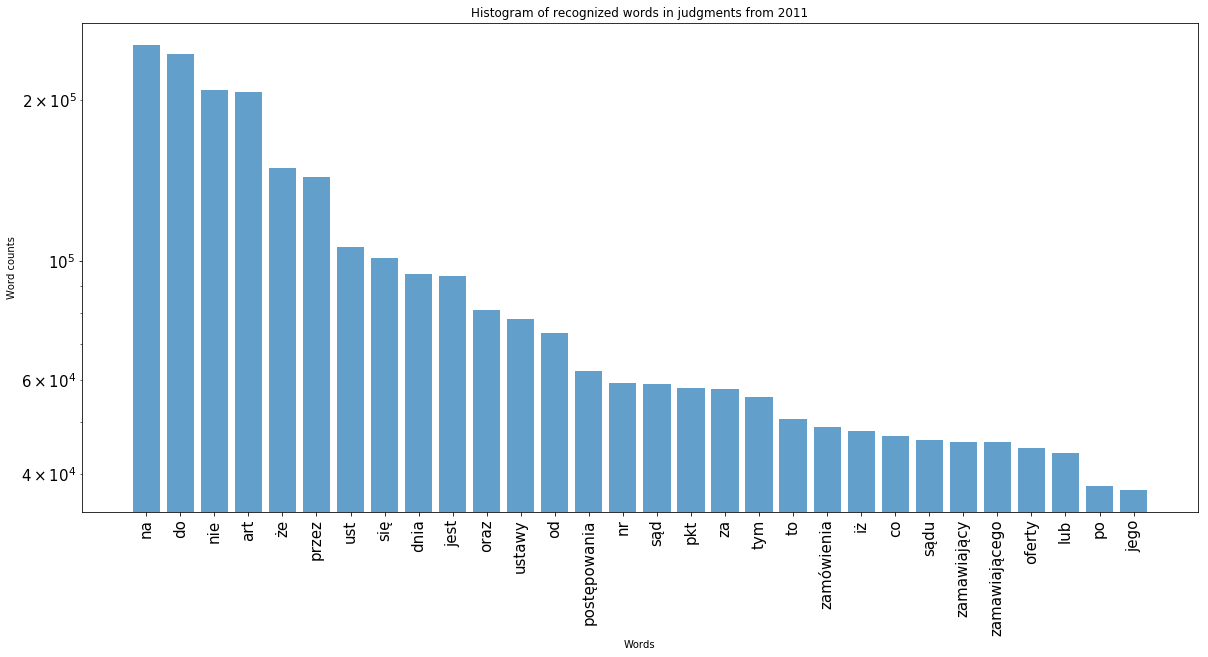

In [77]:
import matplotlib.pyplot as plt

words, word_counts = zip(*reduced_words_with_counts)
plt.bar(words, word_counts, alpha=0.7, log=True)
plt.xlabel('Words')
plt.ylabel('Word counts')
plt.yscale('log')
plt.title('Histogram of recognized words in judgments from 2011')

plt.rcParams['ytick.labelsize'] = 15 
plt.rcParams['xtick.labelsize'] = 15 

plt.rcParams["figure.figsize"] = (20, 9)
plt.xticks(rotation=90)
plt.show()

In [84]:
polish_words = {}
not_recognized = {}

for word, counts in words_with_counts.items():
    if word in polish_dictionary:
        polish_words[word] = counts
    else:
        not_recognized[word] = counts

In [85]:
from pprint import pprint
print("Top 10 recognized Polish words: ")
pprint(sort_by_frequency(polish_words))


Top 10 recognized Polish words: 
[('na', 253290),
 ('do', 244364),
 ('nie', 208698),
 ('art', 207198),
 ('że', 149133),
 ('przez', 143483),
 ('ust', 106139),
 ('się', 101380),
 ('dnia', 94506),
 ('jest', 93871)]


In [86]:
print("Top 30 words, which were not recognized: ")
pprint(sort_by_frequency(not_recognized), top=)

Top 10 words, which were not recognized: 
[('pzp', 35834),
 ('siwz', 26388),
 ('sygn', 26215),
 ('zw', 11099),
 ('ssn', 6102),
 ('otk', 4902),
 ('iv', 4493),
 ('lex', 4430),
 ('zu', 4359),
 ('sa', 3852)]


KeyboardInterrupt: 